### Importing libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### load dataset

In [2]:
df = pd.read_csv("P:\\datasets\\heart_deasease.csv")

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.shape

(303, 14)

### feature engineering

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

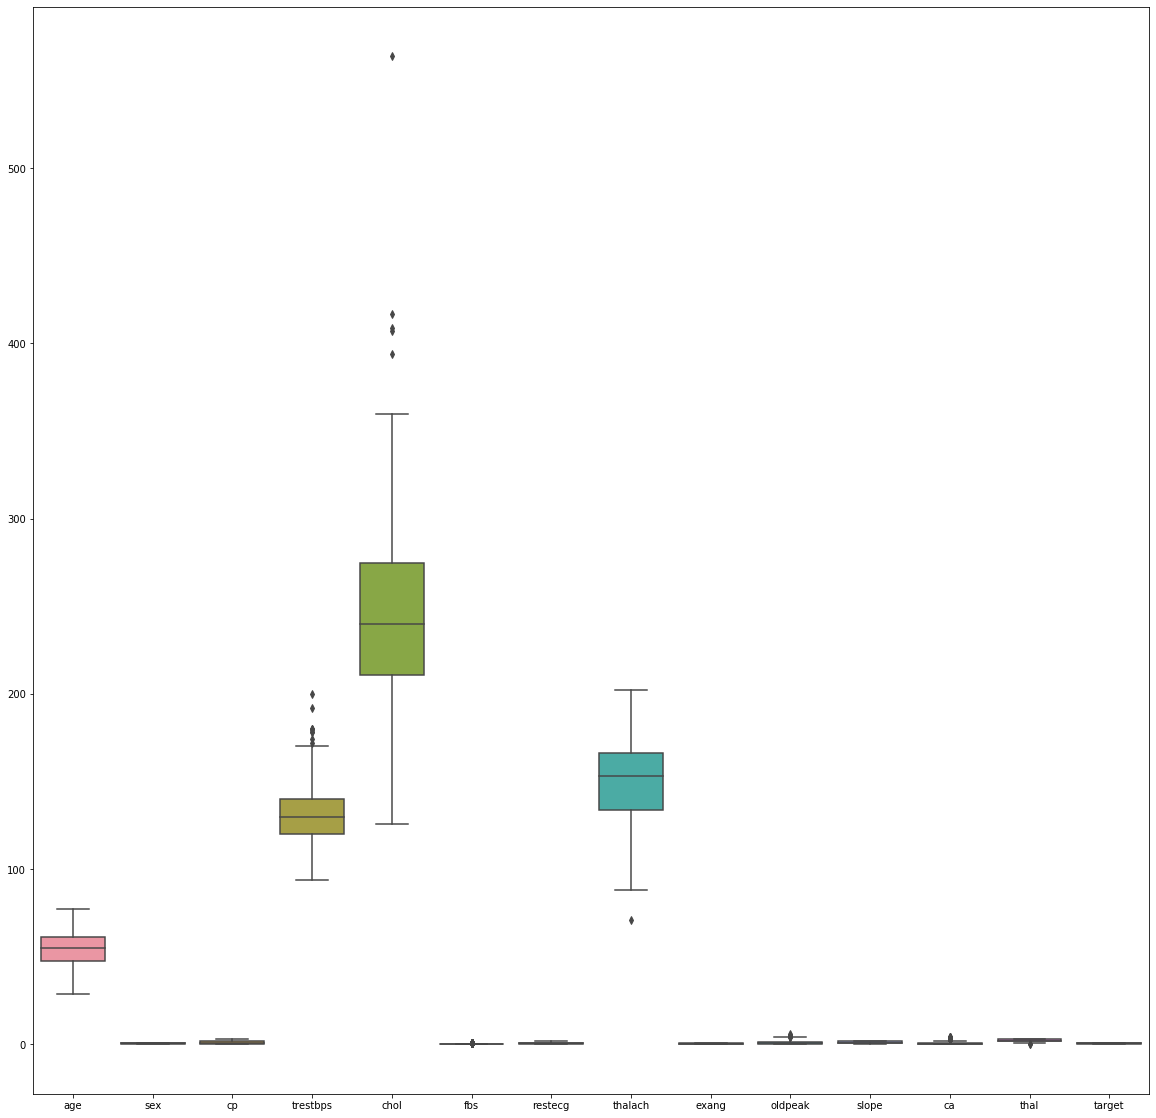

In [6]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

In [7]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

[[0.9521966  0.68100522 1.97312292 ... 0.71442887 2.14887271 0.91452919]
 [1.91531289 0.68100522 1.00257707 ... 0.71442887 0.51292188 0.91452919]
 [1.47415758 1.46841752 0.03203122 ... 0.71442887 0.51292188 0.91452919]
 ...
 [1.50364073 0.68100522 0.93851463 ... 1.24459328 1.12302895 1.09345881]
 [0.29046364 0.68100522 0.93851463 ... 0.26508221 1.12302895 1.09345881]
 [0.29046364 1.46841752 0.03203122 ... 0.26508221 0.51292188 1.09345881]]


In [8]:
threshold = 3
print(np.where(z > 3))# The first array contains the list of row numbers and second array respective column numbers

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [10]:
df = df[(z < 3).all(axis=1)]

In [11]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(228, 14)

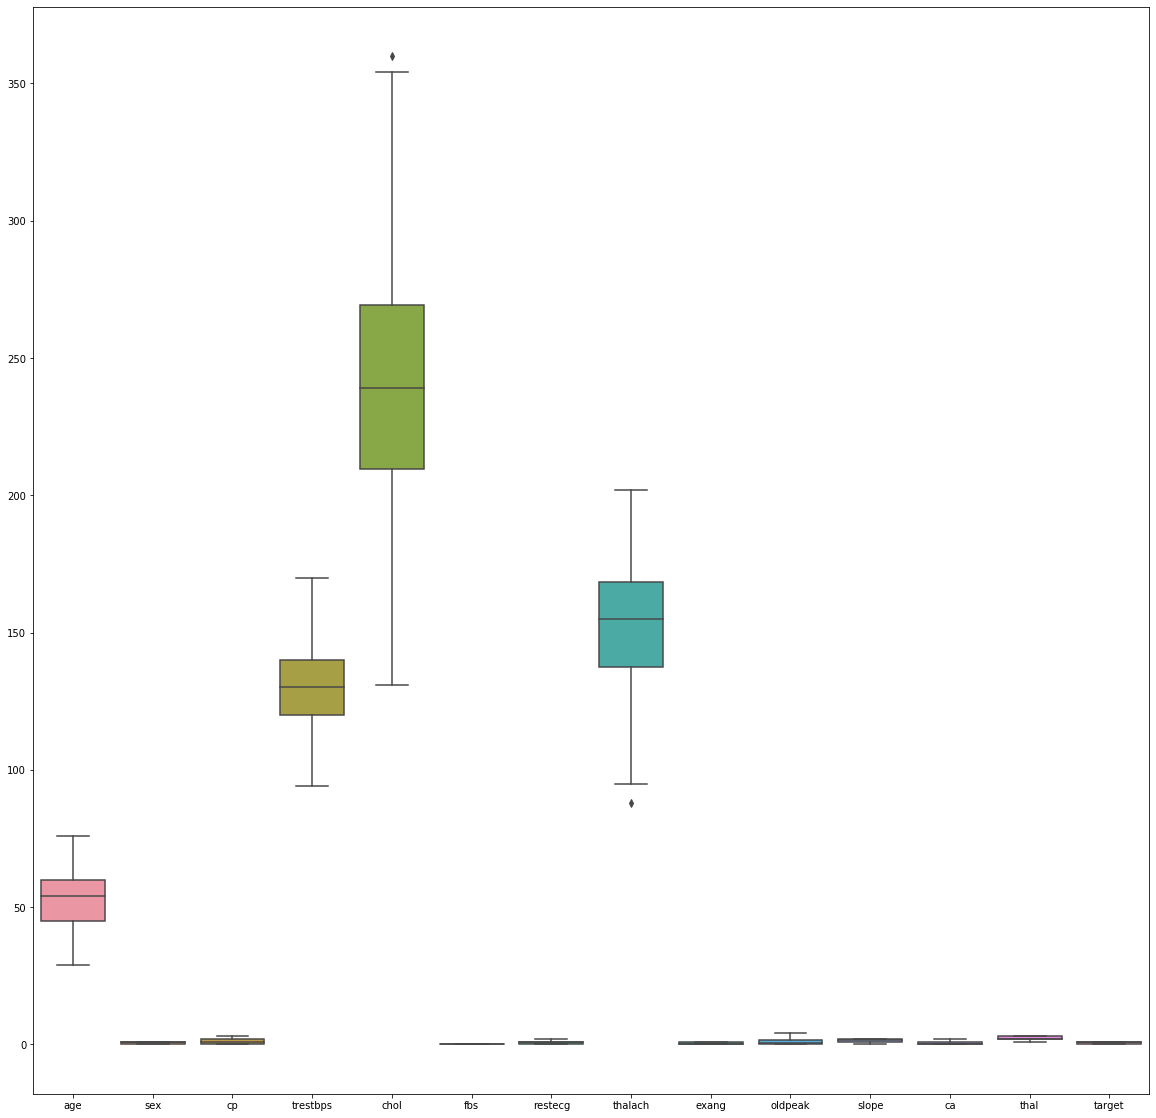

In [12]:
plt.figure(figsize=(20,20))
ax = sns.boxplot(data=df)

### feature selection

In [13]:
df.describe()

age         sex          cp    trestbps        chol    fbs  \
count  228.000000  228.000000  228.000000  228.000000  228.000000  228.0   
mean    53.333333    0.675439    0.942982  128.671053  242.372807    0.0   
std      9.229016    0.469241    1.020190   15.349142   44.329827    0.0   
min     29.000000    0.000000    0.000000   94.000000  131.000000    0.0   
25%     45.000000    0.000000    0.000000  120.000000  209.750000    0.0   
50%     54.000000    1.000000    1.000000  130.000000  239.000000    0.0   
75%     60.000000    1.000000    2.000000  140.000000  269.250000    0.0   
max     76.000000    1.000000    3.000000  170.000000  360.000000    0.0   

          restecg     thalach       exang     oldpeak       slope         ca  \
count  228.000000  228.000000  228.000000  228.000000  228.000000  228.00000   
mean     0.548246  151.070175    0.315789    0.946053    1.451754    0.47807   
std      0.516125   22.492963    0.465852    1.035422    0.587945    0.69893   
min      0.000000   88.000000    0.000000    0.000000    0.000000    0.00000   
25%      0.000000  137.500000    0.000000    0.000000    1.000000    0.00000   
50%      1.000000  155.000000    0.000000    0.600000    1.500000    0.00000   
75%      1.000000  168.250000    1.000000    1.600000    2.000000    1.00000   
max      2.000000  202.000000    1.000000    4.000000    2.000000    2.00000   

             thal      target  
count  228.000000  228.000000  
mean     2.315789    0.578947  
std      0.560299    0.494814  
min      1.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

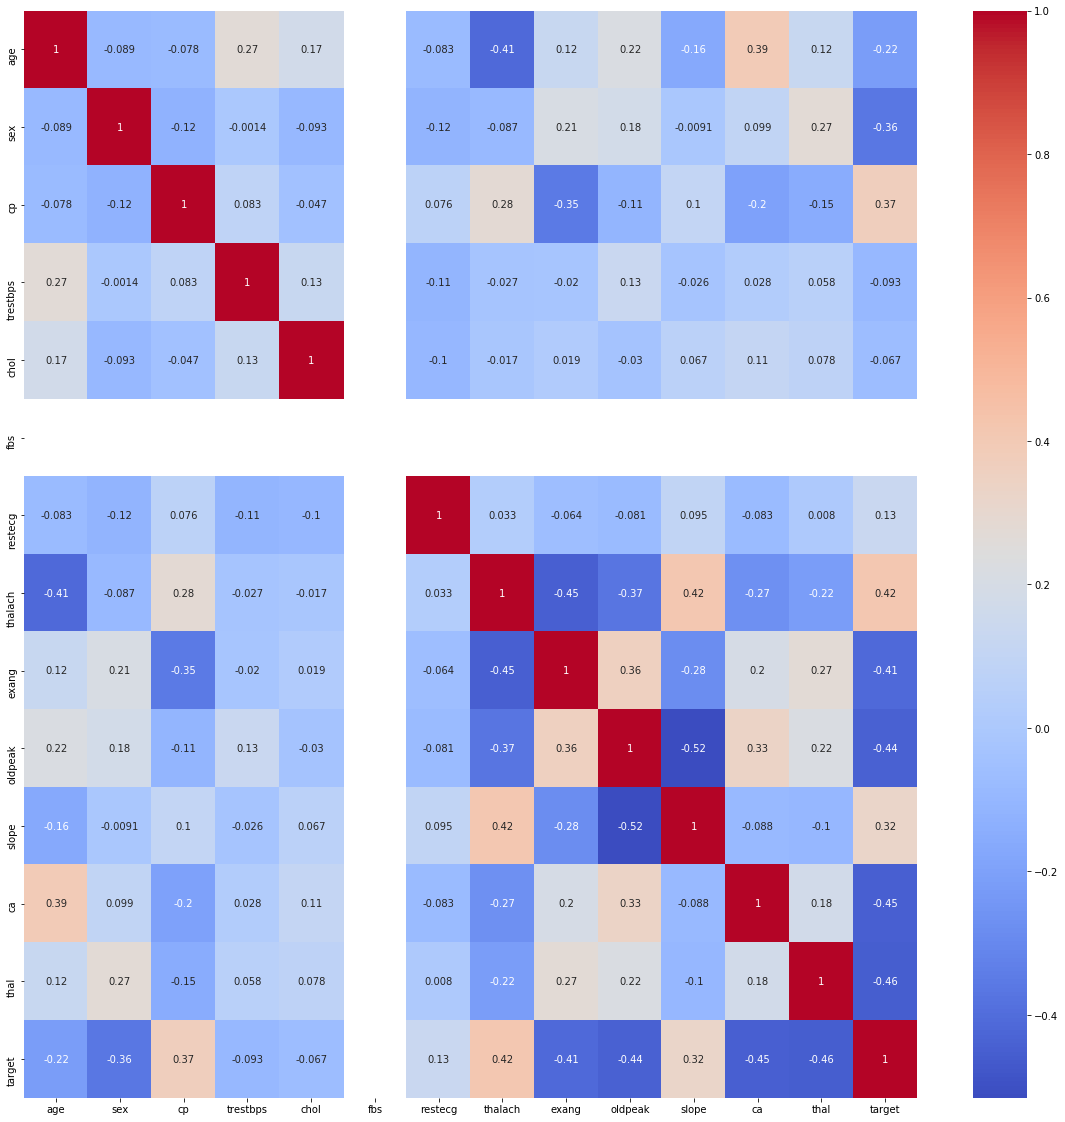

In [14]:
plt.figure(figsize=(20,20))
d = sns.heatmap(df.corr(),cmap="coolwarm",annot= True)

In [15]:
#dataset = dataset.drop(columns= "chol")
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   

   ca  thal  target  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
5   0     1       1

### visualisation

C:\Users\premb\anaconda3\envs\python_ml_2020\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\premb\anaconda3\envs\python_ml_2020\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\premb\anaconda3\envs\python_ml_2020\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\premb\anaconda3\envs\python_ml_2020\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\premb\anaconda3\envs\python_ml_2020\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, Use

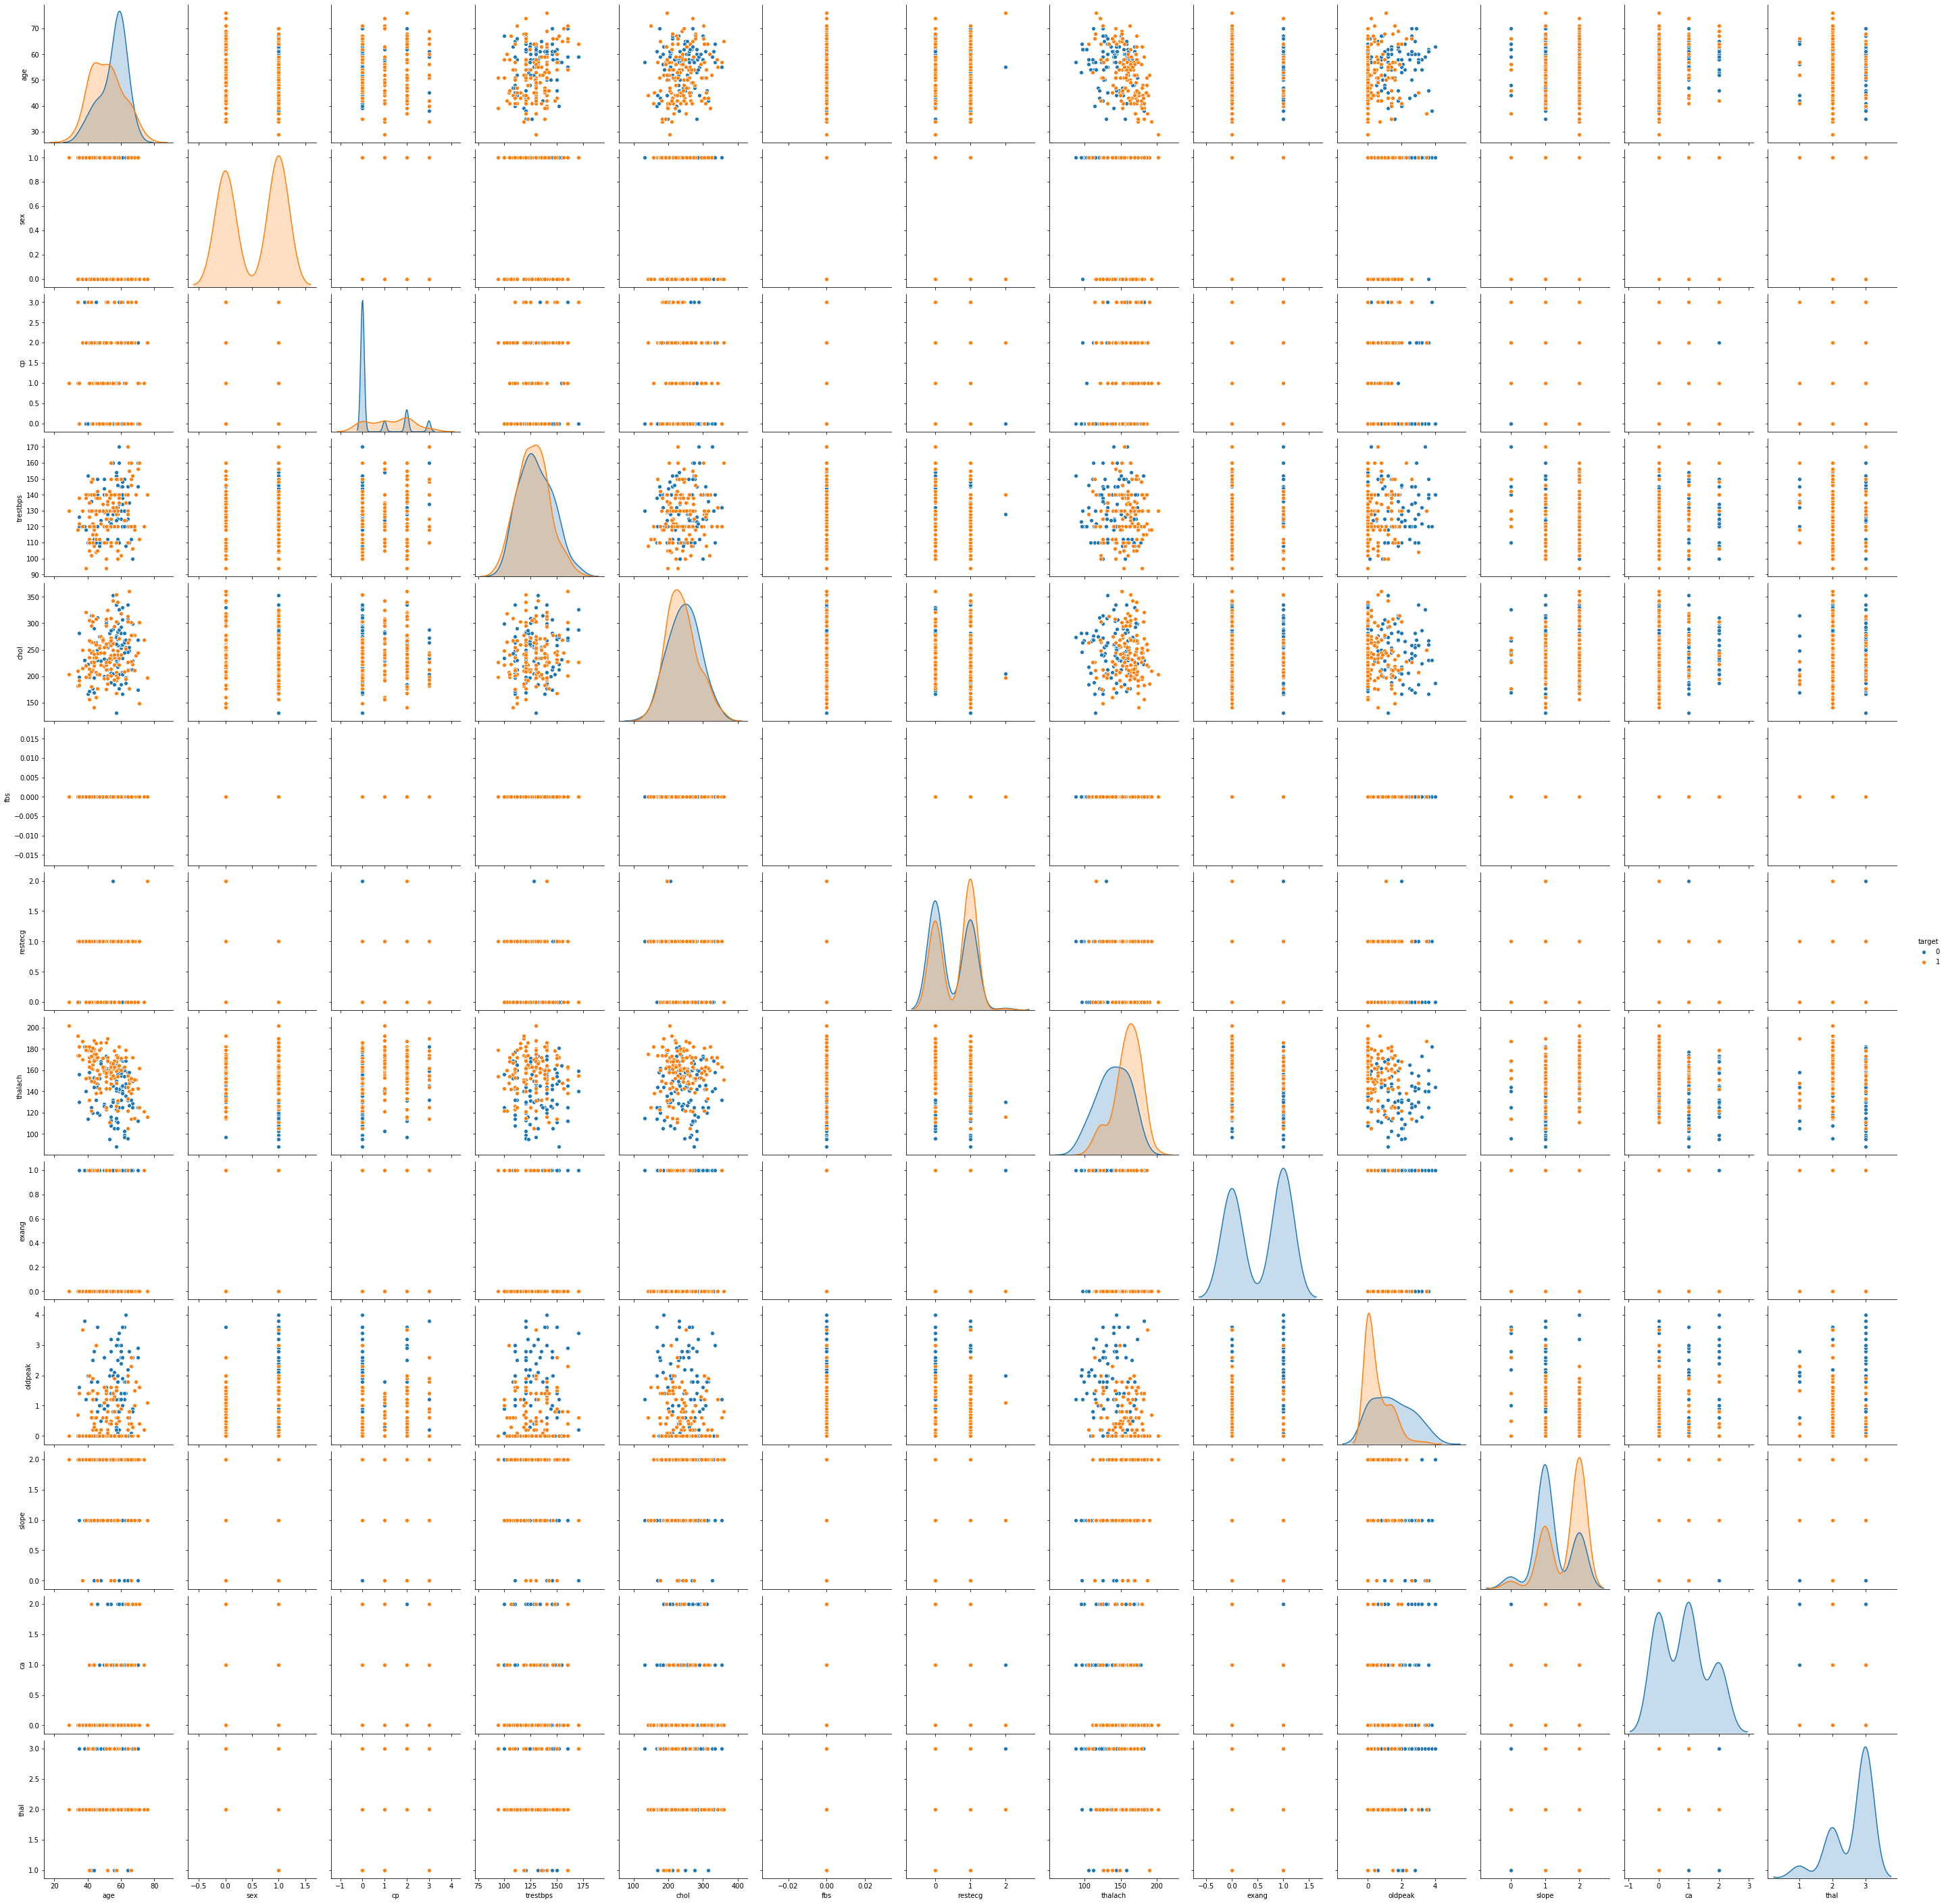

In [16]:
sns.pairplot(df , hue="target", height=3, aspect=1);

### model selection

#### Pipelines In SkLearn

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [18]:
y = df['target']
X = df.drop(['target'], axis = 1) 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)  

In [21]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

In [22]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [23]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])

In [24]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestClassifier())])

In [25]:
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',KNeighborsClassifier(n_neighbors = 5))])

In [26]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_knn]

In [27]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [28]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest',3: "knn"}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [29]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.8478260869565217
Decision Tree Test Accuracy: 0.782608695652174
RandomForest Test Accuracy: 0.8043478260869565
knn Test Accuracy: 0.8478260869565217


#### Pipelines Perform Hyperparameter Tuning Using Grid SearchCV

In [30]:
# Create a pipeline
import numpy as np
pipe = Pipeline([("classifier", RandomForestClassifier())])
# Create dictionary with candidate learning algorithms and their hyperparameters
grid_param = [
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2','l1'],
                 "classifier__C": np.logspace(0, 4, 10)
                 },
                {"classifier": [LogisticRegression()],
                 "classifier__penalty": ['l2'],
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()],
                 "classifier__n_estimators": [10, 100, 1000],
                 "classifier__max_depth":[5,8,15,25,30,None],
                 "classifier__min_samples_leaf":[1,2,5,10,15,100],
                 "classifier__max_leaf_nodes": [2, 5,10]}]
# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [31]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=5, max_features='auto',
                                        max_leaf_nodes=10, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=2, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)
The mean accuracy of the model is: 0.8913043478260869
